## Week 1
Produce a Jupyter notebook with a data report to document:

a. the structure and statistics of the raw data

b. how the data can help answer the business problem(s)

c. what additional data is needed to answer the business problem(s)

Locate the additional data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
pd.options.display.max_rows = 500
pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings("ignore") 

from datetime import datetime
from IPython.display import display, Markdown
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Load the data
collisions_df = pd.read_csv('../data/Collisions.csv',
                            parse_dates={'Datetime': ['INCDTTM']}, 
                            infer_datetime_format=True)
intersections_df = pd.read_csv('../data/Intersections.csv')
streets_df = pd.read_csv('../data/Seattle_Streets.csv')

## EXPLORING SEATTLE STREET DATA

In [3]:
streets_df.head()

,OBJECTID,ARTCLASS,COMPKEY,UNITID,UNITID2,UNITIDSORT,UNITDESC,STNAME_ORD,XSTRLO,XSTRHI,ARTDESCRIPT,OWNER,STATUS,BLOCKNBR,SPEEDLIMIT,SEGDIR,ONEWAY,ONEWAYDIR,FLOW,SEGLENGTH,SURFACEWIDTH,SURFACETYPE_1,SURFACETYPE_2,INTRLO,DIRLO,INTKEYLO,INTRHI,DIRHI,NATIONHWYSYS,STREETTYPE,PVMTCONDINDX1,PVMTCONDINDX2,TRANCLASS,TRANDESCRIPT,SLOPE_PCT,PVMTCATEGORY,PARKBOULEVARD,SHAPE_Length
0,1,2.0,1006,10.0,120.0,100120.0,1ST AVE BETWEEN SENECA ST AND UNIVERSITY ST,1ST AVE,SENECA ST,UNIVERSITY ST,Minor Arterial,,INSVC,1200.0,25.0,NW,N,,,306.0,48.0,PCC,AC/PCC,1ST AVE AND SENECA ST,NW,29611.0,1ST AVE AND UNIVERSITY ST,SE,N,Downtown Neighborhood,87.0,62.0,1,PRINCIPAL TRANSIT ROUTE,4.0,ART,N,305.966050
1,2,2.0,1009,10.0,150.0,100150.0,1ST AVE BETWEEN PIKE ST AND PINE ST,1ST AVE,PIKE ST,PINE ST,Minor Arterial,,INSVC,1500.0,25.0,NW,N,,,426.0,104.0,AC/PCC,PCC,1ST AVE AND PIKE ST,NW,29593.0,1ST AVE AND PINE ST,SE,N,Downtown Neighborhood,57.0,58.0,1,PRINCIPAL TRANSIT ROUTE,5.0,ART,N,426.031562
2,3,0.0,1032,15.0,80.0,150080.0,1ST AVE N BETWEEN VALLEY UPPER ST AND ALOHA ST,1ST AVE N,VALLEY UPPER ST,ALOHA ST,Not Designated,,INSVC,800.0,20.0,N,N,,,297.0,0.0,PCC,NaN,1ST AVE N AND VALLEY UPPER ST,N,28897.0,1ST AVE N AND ALOHA ST,S,N,Neighborhood Yield Street,0.0,0.0,0,NOT DESIGNATED,17.0,NON-ART,N,297.147592
3,4,0.0,1051,15.0,230.0,150230.0,1ST AVE N BETWEEN LYNN ST AND MCGRAW S ST,1ST AVE N,LYNN ST,MCGRAW S ST,Not Designated,,INSVC,2200.0,20.0,N,N,,,175.0,25.0,AC,NaN,1ST AVE N AND LYNN ST,N,28113.0,1ST AVE N AND MCGRAW S ST,S,N,Neighborhood Yield Street,9.0,0.0,0,NOT DESIGNATED,3.0,NON-ART,N,174.804983
4,5,0.0,1060,15.0,282.0,150282.0,1ST AVE N BETWEEN FULTON S ST AND FULTON N ST,1ST AVE N,FULTON S ST,FULTON N ST,Not Designated,,INSVC,2800.0,20.0,N,N,,,73.0,0.0,PCC,NaN,1ST AVE N AND FULTON S ST,N,28051.0,1ST AVE N AND FULTON N ST,S,N,Neighborhood Yield Street,0.0,0.0,0,NOT DESIGNATED,5.0,NON-ART,N,73.110708


In [4]:
streets_df.shape

(23806, 38)

# ABOUT THE DATA FEATURES
<b>OBJECTID</b> - ESRI unique identifier

<b>ARTCLASS</b> - Arterial classification code:
    <ol>5 - Interstate Freeway
    <br>4 - State Highway
    <br>3 - Collector Arterial
    <br>2 - Minor Arterial
    <br>1 - Principal Arterial
    <br>0 - Not Designated (not an arterial)</ol>
    
<b>COMPKEY</b> - Primary key of the Street asset table, assigned
by the Hansen asset management system. 
    
<b>UNITID</b> - <i>N/A</i>  

<b>UNITID2</b> - <i>N/A</i>   

<b>UNITIDSORT</b> - Alpha-numeric Hansen unique identifier

<b>UNITIDESC</b> - Structured description of the Street location

<b>STNAME_ORD</b> - Street segment name   

<b>XSTRLO</b> - Cross street at low end of segment

<b>XSTRHI</b> - Cross street at high end of segment    

<b>ARTDESCRIPT</b> - Arterial class code description   

<b>OWNER</b> - The organization that owns the street, if not the city  

<b>STATUS</b> - Current street status <i> INSVC = in service </i>  

<b>BLOCKNBR</b> - Identification number of block street runs adjacent to

<b>SPEEDLIMIT</b> - Speed limit in MPH    

<b>SEGDIR</b> - Street segment direction   

<b>ONEWAY</b> - One Way Street (Y/N)    

<b>ONEWAYDIR</b> - One Way Street traffic flow direction

<b>FLOW</b> - One Way Street traffic flow classification    

<b>SEGLENGTH</b> - Street segment length in feet   

<b>SURFACEWIDTH</b> - Street segment width in feet     

<b>SURFACETYPE_1</b> - Primary pavement used on Street surface
    <ol>AC - Asphalt Concrete
    <br>PCC - Rigid Pavement
    <br>AC/PCC - Composite AC and PCC
    <br>ST - Bituminous Surface Treatment

<b>SURFACETYPE_2</b> - Secondary pavement used on Street surface     

<b>INTRLO</b> - Description of the intersection location with cross street at high address end of segment    

<b>DIRLO</b> - Relative direction of low address end of segment   

<b>INTKEYLO</b> - Intersection key at low address end of segment     

<b>INTRHI</b> - Description of the intersection location with cross street at high address end of segment      

<b>DIRHI</b> - Direction of high address end of segment   

<b>NATIONHWYSYS</b> - Whether the street is part of the National Highway System (Y/N)      

<b>STREETTYPE</b> - Street type classification (from Seattle Right of Way Improvements Manual) 
    https://streetsillustrated.seattle.gov/https-streetsillustrated-seattle-gov-wp-content-uploads-2019-12-streettyperelationships-movementplacev4-jpg/street-classification/

<b>PVMTCONDINDX1</b> - Primary pavement condition, out of 100     

<b>PVMTCONDINDX2</b> - Secondary pavement condition, out of 100     

<b>TRANCLASS</b> - Street transit classification   

<b>TRANDESCRIPT</b> - Transit class description

<b>SLOPE_PCT</b> - Street grade in slope percentage 

<b>PVMTCATEGORY</b> - <i>N/A</i> 

<b>PARKBOULEVARD</b> - <i>N/A</i> 
    
<b>SHAPE_Length</b> - ESRI field that stores information about the length of a feature in GIS     

In [5]:
# Consider how many missing and unique values there are in each column
col_na = round(100*(streets_df.isna().sum()/len(streets_df)), 2)
col_nunique = streets_df.nunique()
df_summary = pd.DataFrame({"data_type": streets_df.dtypes,
                           "percent_missing_values": col_na,
                           "total_unique_values": col_nunique}).sort_values(by=["percent_missing_values"],
                                                                            ascending=False)
df_summary

,data_type,percent_missing_values,total_unique_values
SURFACETYPE_2,object,97.13,5
SURFACETYPE_1,object,5.03,6
STREETTYPE,object,3.33,12
TRANDESCRIPT,object,0.79,7
SLOPE_PCT,float64,0.08,34
INTRHI,object,0.05,14234
ONEWAY,object,0.05,2
SURFACEWIDTH,float64,0.04,94
INTKEYLO,float64,0.04,14110
INTRLO,object,0.04,14109


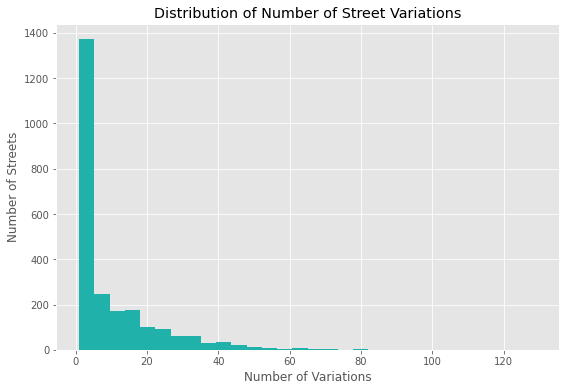

In [6]:
#DISTRIBUTION OF VARIATIONS BY STREET
fig, ax = plt.subplots(figsize=(9,6))
ax.hist(streets_df['STNAME_ORD'].value_counts(), bins=30, color='lightseagreen')
ax.set_title('Distribution of Number of Street Variations')
ax.set_xlabel('Number of Variations')
ax.set_ylabel('Number of Streets');

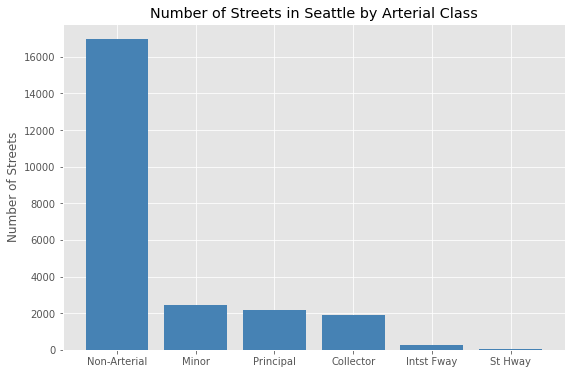

In [7]:
#ARTERIAL CLASS DISTRIBUTION
artclass_dict = {5 : 'Intst Fway',
                 4 : 'St Hway',
                 3 : 'Collector',
                 2 : 'Minor',
                 1 : 'Principal',
                 0 : 'Non-Arterial'}

fig, ax = plt.subplots(figsize=(9,6))
arterials = streets_df['ARTCLASS'].value_counts().iloc[:6]

ax.bar([artclass_dict[i] for i in arterials.index], arterials, color='steelblue')
ax.set_title('Number of Streets in Seattle by Arterial Class')
ax.set_ylabel('Number of Streets', size=12);

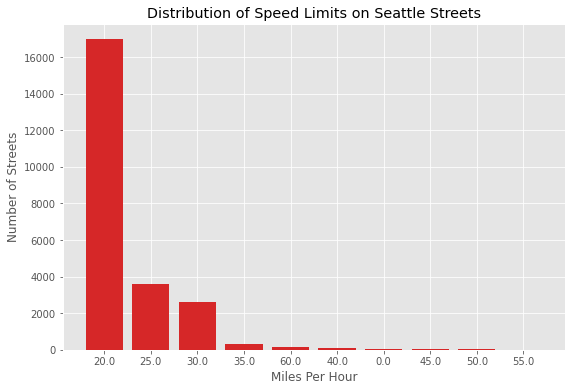

In [8]:
#Speed Limits 
fig, ax = plt.subplots(figsize=(9,6))
speeds = streets_df['SPEEDLIMIT'].value_counts()
ax.bar(speeds.index.astype(str), speeds, color='tab:red')
ax.set_title('Distribution of Speed Limits on Seattle Streets')
ax.set_xlabel('Miles Per Hour')
ax.set_ylabel('Number of Streets', size=12);

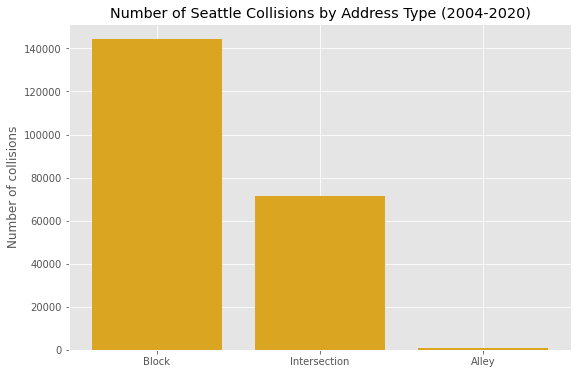

In [9]:
#Compare location types for collisions
fig, ax = plt.subplots(figsize=(9,6))
addr_types = collisions_df['ADDRTYPE'].value_counts()
ax.bar(addr_types.index, addr_types, color='goldenrod')
ax.set_title('Number of Seattle Collisions by Address Type (2004-2020)')
ax.set_ylabel('Number of collisions', size=12);

In [10]:
#Look at Collisions not occuring at Intersections
block_mask = collisions_df['ADDRTYPE'] == 'Block'
collision_streets = collisions_df[block_mask]['LOCATION'].apply(lambda string: string.split(' BETWEEN ')[0])

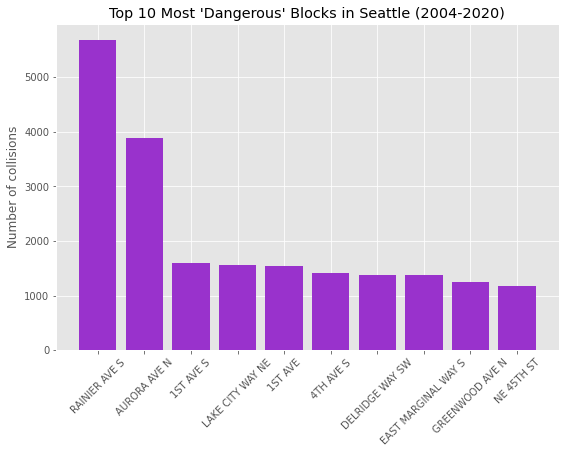

In [11]:
fig, ax = plt.subplots(figsize=(9,6))
top_10 = collision_streets.value_counts().sort_values(ascending=False)[:10]
ax.bar(top_10.index, top_10, color='darkorchid')
ax.set_title("Top 10 Most 'Dangerous' Blocks in Seattle (2004-2020)")
ax.set_ylabel('Number of collisions', size=12)
ax.tick_params(axis='x', labelrotation=45);

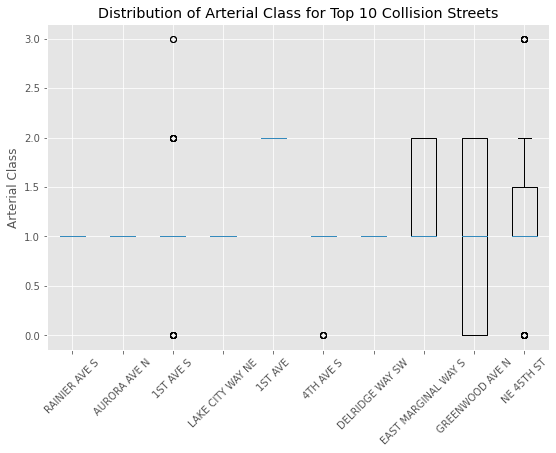

In [12]:
fig, ax = plt.subplots(figsize=(9,6))
classes = [streets_df[streets_df['STNAME_ORD'] == i]['ARTCLASS'].values for i in top_10.index]

ax.boxplot(classes)
ax.set_xticklabels(top_10.index, rotation=45)
ax.set_title('Distribution of Arterial Class for Top 10 Collision Streets')
ax.set_ylabel('Arterial Class');

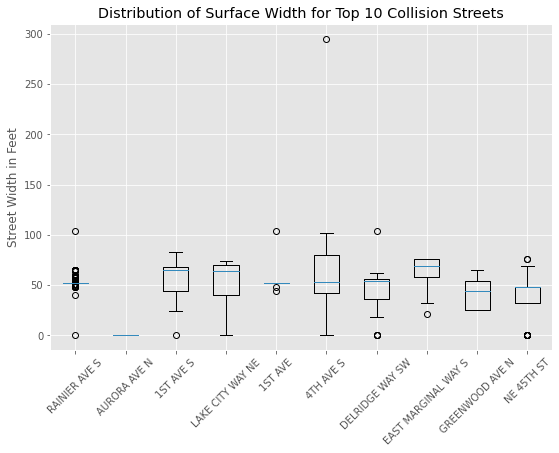

In [13]:
fig, ax = plt.subplots(figsize=(9,6))
slopes = [streets_df[streets_df['STNAME_ORD'] == i]['SURFACEWIDTH'].values for i in top_10.index]

ax.boxplot(slopes)
ax.set_xticklabels(top_10.index, rotation=45)
ax.set_title('Distribution of Surface Width for Top 10 Collision Streets')
ax.set_ylabel('Street Width in Feet');

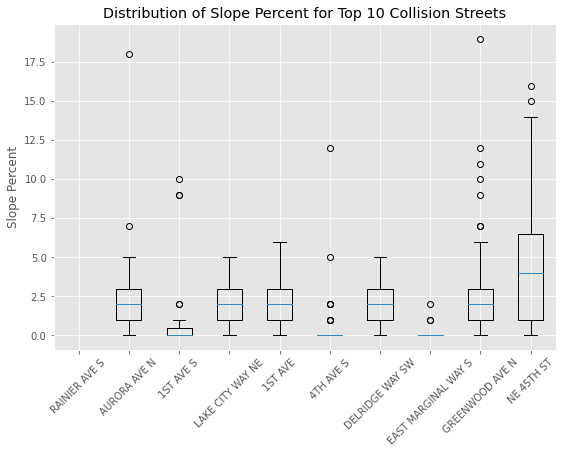

In [14]:
fig, ax = plt.subplots(figsize=(9,6))
slopes = [streets_df[streets_df['STNAME_ORD'] == i]['SLOPE_PCT'].values for i in top_10.index]

ax.boxplot(slopes)
ax.set_xticklabels(top_10.index, rotation=45)
ax.set_title('Distribution of Slope Percent for Top 10 Collision Streets')
ax.set_ylabel('Slope Percent');

# Exploring Collisions Data

The collisions data is a goldmine of information, but there are many features with missing or inconsistent data. Missing data can often be filled in based on the collision description. 

Some features, like speeding, are missing >75% of the data. However, this feature is likely too important to drop completely from our analysis. 

### General Statistics

#### Features

##### Numeric
- PERSONCOUNT (# of people invovled)  
- PEDCOUNT (# of pedestirans)  
- PEDCYLCOUNT (# of cyclists)  
- VEHCOUNT (# of vehicles)
- INJURIES (# of injuries)
- SERIOUSINJURIES (# of serious injuries)
- FATALITIES (# of deaths)  

##### Human factors
- INATTENTIONIND (whether or not collision was due to inattention)
- UNDERINFL (whether or not a driver involved was under the influence)
- PEDROWNOTGRNT(Whether pedestrian had the right of way)
- SPEEDING (whether or not speeding was a factor in the collision)
- ST_COLCODE (collision type label)


##### Characteristics of the site
- ADDRTYPE (address type)
- LOCATION (described in street names)
- X & Y (GPS location)
- CROSSWALKKEY (crosswalk label)
- JUNCTIONTYPE (junction type)
- ROADCOND (road condition)

##### External factors
- LIGHTCOND (light condition)
- WEATHER (description of the weather conditions during the time of the collision)

In [15]:
collisions_df.describe()

,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,212878.000000,212878.000000,220338.000000,220338.000000,220338.000000,71472.000000,220338.000000,220338.000000,220338.000000,220338.000000,220338.000000,220338.000000,220338.000000,220337.000000,1.272050e+05,220338.000000,2.203380e+05
mean,-122.330752,47.620234,110169.500000,143809.710463,144031.876830,37601.430980,2.227119,0.038155,0.027294,1.730614,0.373839,0.015168,0.001675,13.382124,7.971063e+06,262.542689,9.621717e+03
std,0.030042,0.056006,63606.246144,88381.117503,88747.658541,51864.925192,1.471631,0.201883,0.164355,0.829109,0.732377,0.158098,0.044503,7.306179,2.611523e+06,3255.640460,7.162528e+04
min,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,-122.349280,47.577331,55085.250000,71371.250000,71371.250000,28652.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,6.007029e+06,0.000000,0.000000e+00
50%,-122.330348,47.616106,110169.500000,126657.500000,126657.500000,29973.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,8.033011e+06,0.000000,0.000000e+00
75%,-122.312000,47.664228,165253.750000,208221.750000,208421.750000,33983.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,14.000000,1.018101e+07,0.000000,0.000000e+00
max,-122.238949,47.734142,220338.000000,332492.000000,333992.000000,757580.000000,93.000000,6.000000,2.000000,15.000000,78.000000,41.000000,5.000000,87.000000,1.307202e+07,525241.000000,5.239700e+06


#### Missing Values in Data

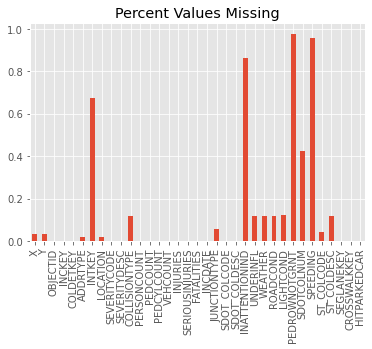

In [16]:
# Clean up and set index to datetime
collisions_df = (
    collisions_df.set_index('Datetime')
    .sort_index()
    .drop(columns=['EXCEPTRSNDESC', 'EXCEPTRSNCODE', 'REPORTNO', 'STATUS'])
)

# Plot missing values
pct_null = (collisions_df.isna().sum()/collisions_df.shape[0]).plot(kind='bar', 
                                                              title="Percent Values Missing")

#### Description of accidents that supossedly have zero people and zero vehicles

We will have to backfill some information based on the collision description. There are > 19,000 collisions that claim to have zero people and zero vehicles involved.

In [17]:
# How many of these involve ZERO people (ie, terrible book-keeping)
no_people = collisions_df.loc[(collisions_df['PEDCOUNT'] == 0) & 
           (collisions_df['PEDCYLCOUNT'] == 0) & 
           (collisions_df['PERSONCOUNT'] == 0) & 
            (collisions_df['VEHCOUNT'] == 0)]

no_people_frac = no_people.shape[0]/collisions_df.shape[0]
print('Fraction of collisions that have zero people and zero vehicles: {:0.4f}\n'.format(no_people_frac))
print('Descriptions of these events:')
# Show descriptions
no_people['SDOT_COLDESC'].value_counts()

Fraction of collisions that have zero people and zero vehicles: 0.0878

Descriptions of these events:


NOT ENOUGH INFORMATION / NOT APPLICABLE                         8060
MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE          4764
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END                    3963
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE          894
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE           529
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT                    306
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE         184
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE          168
MOTOR VEHCILE STRUCK PEDESTRIAN                                  159
MOTOR VEHICLE STRUCK OBJECT IN ROAD                              148
MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE             68
PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE              24
MOTOR VEHICLE OVERTURNED IN ROAD                                  22
DRIVERLESS VEHICLE RAN OFF ROAD - HIT FIXED OBJECT                10
PEDALCYCLIST STRUCK MOTOR VEHICLE 

#### Most Dangerous Intersections

We wanted to look at the most dangerous intersections for cyclists and pedestrians. So we started by looking at the most dangerous intersections overall. <b>Note that the intersection key is missing in over 60% of the data! </b>

Most intersections had only 1 collision, but some of them had > 100

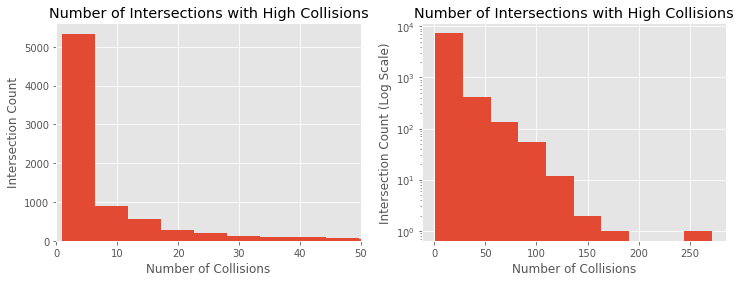

In [18]:
## Look at collision count at specific intersections
n_coll_intersect = collisions_df.groupby(by='INTKEY').count().sort_values(by='OBJECTID', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax = axes[0]
ax.hist(n_coll_intersect['OBJECTID'], bins=50)
ax.set_xlim(0,50)
ax.set_xlabel('Number of Collisions')
ax.set_ylabel('Intersection Count')
ax.set_title("Number of Intersections with High Collisions");

ax = axes[1]
ax.hist(n_coll_intersect['OBJECTID'], bins=10, log=True)
ax.set_xlabel('Number of Collisions')
ax.set_ylabel('Intersection Count (Log Scale)')
ax.set_title("Number of Intersections with High Collisions");

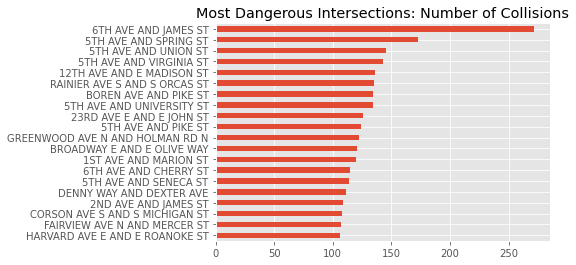

In [19]:
# Find 20 most dangerous intersections
intersections = collisions_df.copy().set_index('INTKEY')
top_20 = list(n_coll_intersect.index[:20])
title = 'Most Dangerous Intersections: Number of Collisions'

intersections['LOCATION'].loc[top_20].value_counts()[::-1].plot(kind='barh', 
                                                                title=title)
ax.set_xlabel('Collision Count');

#### Collisions that included pedestrians or cyclists (or both)

In [20]:
# Break down by pedestrian or cyclist involvement
pedcycle_count = collisions_df.groupby(by='PEDCYLCOUNT').count()['OBJECTID']
ped_count = collisions_df.groupby(by='PEDCOUNT').count()['OBJECTID']

# Get fraction of collisions that included cyclists/pedestrians/no cars
cycle_fraction = pedcycle_count.loc[1:].sum()/pedcycle_count.sum()

# Get fraction of collisions that included pedestrians
ped_fraction = ped_count.loc[1:].sum()/ped_count.sum()

# Are there accidents with no cars involved?
no_cars = collisions_df.loc[((collisions_df['PEDCOUNT'] != 0) | \
           (collisions_df['PEDCYLCOUNT'] != 0)) & \
            (collisions_df['VEHCOUNT'] == 0)]

#veh_count = collisions.groupby(by='VEHCOUNT').count()['OBJECTID']
no_car_fraction = no_cars.shape[0]/collisions_df.shape[0]

# # Put these into own dataframe
pd.DataFrame({'Fraction w/cyclist': cycle_fraction, 
              'Fraction w/ped': ped_fraction,
             'Fraction w/no cars': no_car_fraction}, index=range(1))

,Fraction w/cyclist,Fraction w/ped,Fraction w/no cars
0,0.027063,0.036476,0.001103


# Exploring Additional Data

### Possible additional datasets:

- Current Land Use Zoning Detail: https://data.seattle.gov/Land-Base/Current-Land-Use-Zoning-Detail/9nvb-wk9b
- Bike Rack Locations (Contains lat&long): https://data.seattle.gov/Land-Base/Bike-Racks/pbej-cxb2
- Marked Crosswalks (Contains lat&long, including at signal or stop sign): https://data.seattle.gov/Land-Base/Marked-Crosswalks/dx75-5pzj
- Radar Speed Signs (Contains lat&long): https://data.seattle.gov/Land-Base/Radar-Speed-Signs/siht-4gsh

Bike rack locations, marked crosswalks and radar speed signs are datasets containing latitude and longitudes for those objects. We can attempt to calculate the distance of collisions to the these features. It can potentially be added as features to predicting if an intersection has a higher risk of collisions depending on its proximity to certain features.

In [21]:
# Mapping tool
# pip install geopy
# pip install folium
import folium
from geopy.geocoders import Nominatim

### Bike Racks

Our current assumption is that areas with bike racks would generating more cyclist traffic going to and from the racks.

In [22]:
bikeracks = pd.read_csv('../data/Bike_Racks.csv')
bikeracks.head()

,X,Y,OBJECTID,COMPKEY,COMPTYPE,SEGKEY,DISTANCE,WIDTH,UNITID,UNITTYPE,UNITDESC,BIKE_FACILITY,RACK_CAPACITY,DELINEATOR_POSTS,FINISH_TYPE,SURFACE_TYPE,INSTALL_DATE,MOUNT_TYPE,COLOR,MANUFACTURER,MODEL_TYPE,CONDITION,CONDITION_ASSESSMENT_DATE,SIDE,OWNERSHIP,CURRENT_STATUS,PRIMARYDISTRICTCD,SECONDARYDISTRICTCD,OVERRIDEYN,OVERRIDECOMMENT,SHAPE_LNG,SHAPE_LAT
0,1.257066e+06,247817.450418,1,639535,16,19236,427.0,-31.0,BKR-3650,BKR,NW MARKET ST 0240 BLOCK N SIDE ( 402) 402 FT W...,SGL,2,N,GALV,PCC,2016/02/29 00:00:00+00,,,,,GOOD,NaN,N,SDOT,INSVC,DISTRICT6,,N,NaN,-122.389310,47.668757
1,1.278455e+06,227063.233437,2,591433,16,14902,125.0,29.0,BKR-3190,BKR,E UNION ST 0240 BLOCK N SIDE ( 112) 112 FT E/O...,CLSTR,6,N,GALV,PCC,2012/11/30 00:00:00+00,SUFMT,,SDOT,BKR-RLRCK,GOOD,2012/10/20 00:00:00+00,N,SDOT,PLANNED,DISTRICT3,,N,NaN,-122.300910,47.613022
2,1.275207e+06,250005.982260,3,518834,16,17262,370.0,-29.0,BKR-520,BKR,NE 65TH ST 0100 BLOCK S SIDE ( 355) 39 FT W/O ...,SGL,2,N,GALV,PCC,2000/11/12 00:00:00+00,SUFMT,NONE,BKR-CRMTL,BKR-RLRCK,GOOD,2009/07/30 00:00:00+00,S,SDOT,INSVC,DISTRICT4,,N,NaN,-122.315866,47.675737
3,1.271784e+06,228002.570526,4,519092,16,12225,206.0,17.0,BKR-422,BKR,PINE ST 0120 BLOCK NW SIDE ( 193) 11 FT SW/O M...,SGL,2,N,GALV,PCC,2005/05/18 00:00:00+00,SUFMT,NONE,BKR-CRMTL,BKR-RLRCK,GOOD,NaN,NW,SDOT,INSVC,DISTRICT3,,N,NaN,-122.328026,47.615245
4,1.263540e+06,253266.784759,5,517282,16,18846,37.0,-17.0,BKR-2280,BKR,NW 76TH ST 0060 BLOCK N SIDE ( 24) 24 FT W/O ...,SGL,4,N,PAINT,PCC,NaN,SUFMT,BLK,BKR-CORA,BKR-W2704,GOOD,2009/07/31 00:00:00+00,N,SDOT,INSVC,DISTRICT6,,N,NaN,-122.363480,47.684049


In [23]:
bikeracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3953 entries, 0 to 3952
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X                          3940 non-null   float64
 1   Y                          3940 non-null   float64
 2   OBJECTID                   3953 non-null   int64  
 3   COMPKEY                    3953 non-null   int64  
 4   COMPTYPE                   3953 non-null   int64  
 5   SEGKEY                     3953 non-null   int64  
 6   DISTANCE                   3953 non-null   float64
 7   WIDTH                      3946 non-null   float64
 8   UNITID                     3953 non-null   object 
 9   UNITTYPE                   3953 non-null   object 
 10  UNITDESC                   3953 non-null   object 
 11  BIKE_FACILITY              3953 non-null   object 
 12  RACK_CAPACITY              3953 non-null   int64  
 13  DELINEATOR_POSTS           3953 non-null   objec

In [24]:
bikeracks.describe()

,X,Y,OBJECTID,COMPKEY,COMPTYPE,SEGKEY,DISTANCE,WIDTH,RACK_CAPACITY,OVERRIDECOMMENT,SHAPE_LNG,SHAPE_LAT
count,3.940000e+03,3940.000000,3953.000000,3953.000000,3953.0,3953.000000,3953.000000,3946.000000,3953.000000,0.0,3953.000000,3953.000000
mean,1.269985e+06,231892.313295,1977.000000,566358.186441,16.0,17366.003036,237.913503,-0.579321,2.893752,NaN,-122.352250,47.623118
std,7.146816e+03,15411.690509,1141.277135,73356.327275,0.0,50982.801620,514.411184,27.659317,2.548883,NaN,0.290897,0.063000
min,1.249223e+06,185196.853746,1.000000,507180.000000,16.0,1001.000000,-271.000000,-61.000000,0.000000,NaN,-127.390658,46.808300
25%,1.266078e+06,224258.963786,989.000000,517722.000000,16.0,7246.000000,80.000000,-27.000000,2.000000,NaN,-122.352364,47.604526
50%,1.270261e+06,229254.574623,1977.000000,518843.000000,16.0,11453.000000,170.000000,-17.000000,2.000000,NaN,-122.334058,47.618663
75%,1.274628e+06,244876.205375,2965.000000,614504.000000,16.0,14630.000000,276.000000,27.000000,2.000000,NaN,-122.317260,47.661462
max,1.290757e+06,270742.749257,3953.000000,764154.000000,16.0,701839.000000,8226.602746,64.000000,42.000000,NaN,-122.248262,47.732177


Most of these columns won't really be of value except for the location and the size of the bike racks.

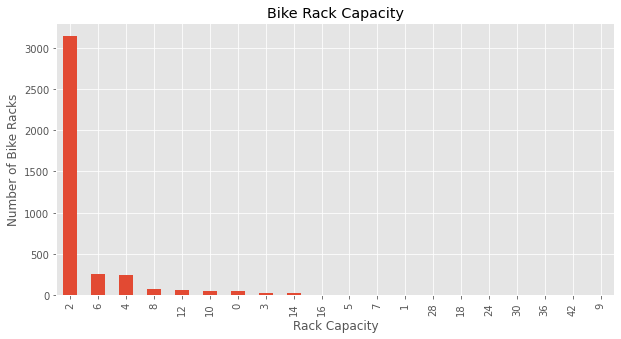

In [25]:
fig, ax = plt.subplots(figsize=(10,5))

bikeracks['RACK_CAPACITY'].value_counts().plot(kind='bar')
ax.set_title('Bike Rack Capacity')
ax.set_xlabel('Rack Capacity')
ax.set_ylabel('Number of Bike Racks');

Majority of the bike racks only hold about 2 bikes. We can check out where the huge bike racks are located.

In [26]:
huge_bikeracks = bikeracks[bikeracks['RACK_CAPACITY'] > 15][['RACK_CAPACITY', 'UNITDESC', 'SHAPE_LNG', 'SHAPE_LAT']]
huge_bikeracks

,RACK_CAPACITY,UNITDESC,SHAPE_LNG,SHAPE_LAT
143,42,LINDEN AVE N 0390 BLOCK W SIDE ( 279) 155 FT S...,-122.348644,47.654936
579,28,NW 81ST ST 0010 BLOCK S SIDE ( 328) 305 FT E/O...,-122.359358,47.687618
969,16,WEST GREEN LAKE DR N 0730 BLOCK SE SIDE ( 20)...,-122.341478,47.682151
1124,16,50TH AVE NE 0700 BLOCK W SIDE ( 512) 125 FT S/...,-122.274402,47.680837
1153,16,NW 90TH ST 0235 BLOCK N SIDE ( 24) 24 FT W/O ...,-122.386861,47.694192
1412,18,STEWART ST 0007 BLOCK NW SIDE ( 13) 13 FT NE/...,-122.342164,47.609758
1537,28,13TH AVE NW 0750 BLOCK W SIDE ( 195) 195 FT N/...,-122.372818,47.683790
1560,30,5TH AVE 0060 BLOCK SW SIDE ( 222) 45 FT SE/O C...,-122.329807,47.604224
1916,16,17TH AVE W 0300 BLOCK W SIDE ( 275) 55 FT S/O ...,-122.378934,47.648249
1970,28,NE RAVENNA WB BV 0050 BLOCK NE SIDE ( 235) 235...,-122.322893,47.677109


We will plot it on a map for better visual.

In [27]:
# Grab general lat&long for Seattle, WA map
sea_address = 'Seattle, WA'

sea_geolocator = Nominatim(user_agent='foursquare_agent')
sea_location = sea_geolocator.geocode(sea_address)
sea_latitude = sea_location.latitude
sea_longitude = sea_location.longitude
print('Seattle coordinates: ', sea_latitude, sea_longitude)

Seattle coordinates:  47.6038321 -122.3300624


In [28]:
# #Generate map centered around address
seattle_map = folium.Map(location=[sea_latitude, sea_longitude], zoom_start=13)

#blue markers for bikeracks
for lat, lng, label in zip(huge_bikeracks['SHAPE_LAT'], huge_bikeracks['SHAPE_LNG'], huge_bikeracks['RACK_CAPACITY'].apply(str)):
    folium.features.CircleMarker(
        [lat, lng],
        radius = 3,
        color='blue',
        popup=label,
        fill=True,
        fill_color='blue',
        fill_opacity=0.5
    ).add_to(seattle_map)
    
seattle_map

Outside of Seattle downtown, all the big capacity bike racks are located at schools or public parks!

### Marked Crosswalks

Looking at where the marked crosswalks are compared to where pedestrian vs vehicle collisions happen give us some insights as to if people are more likely to get in an accident when jaywalking.

In [29]:
marked_cross = pd.read_csv('../data/Marked_Crosswalks.csv')
marked_cross.head()

,X,Y,OBJECTID,COMPKEY,UNITID,UNITDESC,CONDITION,CONDITION_ASSESSMENT_DATE,OWNERSHIP,CURRENT_STATUS,PRIMARYDISTRICTCD,SECONDARYDISTRICTCD,OVERRIDEYN,COMPTYPE,SEGKEY,UNITTYPE,OLD_ID,APPROACH,MARKING_TYPE,SCHOOL,MIDBLOCK_CROSSWALK,INSTALL_DATE,COLOR,COMMENTS,CATEGORY,OWNERSHIP_DATE,CURRENT_STATUS_DATE,MAINTAINED_BY,MAINTENANCE_AGREEMENT,CURBSPACEID,MAINT_DISTRICT,OVERRIDECOMMENT,SHAPE_LNG,SHAPE_LAT,CROSSWALK_CONTROL,MATERIAL,ONSTREET,XSTRLOW,MEAS_FROM_LOW,DISTTOLOW,STPOINT,XSTRHI,MEAS_FROM_HI,DISTTOHI,OFFSET,SIDE,MEASUREMENT_ORIGIN,ATTACHMENT_1,ATTACHMENT_2,ATTACHMENT_3,ATTACHMENT_4,ATTACHMENT_5,ATTACHMENT_6,ATTACHMENT_7,ATTACHMENT_8,ATTACHMENT_9,MAINTENANCE_GROUP,NUM_ATTACHMENTS
0,1.269560e+06,223140.574842,1,522399,XWK-3325,ALASKAN WAY 0060 BLOCK C SIDE ( 35) 35 FT NW/...,GOOD,2012/09/30 00:00:00+00,,INSVC,DISTRICT7,,N,16,8717,XWK,Old ID # 758,NW,LADER,N,N,1970/01/01 00:00:00+00,WHT,"ALASKAN WAY & YESLER WAY, N",XWK,1970/01/01 00:00:00+00,2009/01/22 00:00:00+00,,NaN,NaN,CENTRAL,NaN,-122.336656,47.601800,,THRPL,ALASKAN WAY,YESLER WAY,Y,35,0,COLUMBIA ST,N,234,0,C,XStreet Centerline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XWK-CD7-YEAR4,0
1,1.283979e+06,201215.071449,2,525064,XWK-3029,S HOLLY ST 0440 BLOCK C SIDE ( 385) 20 FT W/O ...,GOOD,2013/08/26 00:00:00+00,,INSVC,DISTRICT2,,N,16,20363,XWK,Old ID # 662,W,LADER,Y,N,1970/01/01 00:00:00+00,WHT,WI #13959 8/27/98 <br> School # 8<br>45 AVE S ...,XWK,1970/01/01 00:00:00+00,2008/11/14 00:00:00+00,,NaN,NaN,SOUTH,NaN,-122.276553,47.542459,,THRPL,S HOLLY ST,44TH AVE S,N,385,0,45TH AVE S,Y,20,0,C,XStreet Centerline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XWK-CD2-YEAR4,0
2,1.268498e+06,242364.672876,3,523429,XWK-416,STONE WAY N 0390 BLOCK C SIDE ( 115) 115 FT N/...,GOOD,2017/06/29 00:00:00+00,SDOT,INSVC,DISTRICT4,,N,16,12959,XWK,Old ID # 485,S,LADER,N,N,1970/01/01 00:00:00+00,WHT,<p>WI #18482 <br>STONE WAY N &amp; BRIDGE WAY ...,XWK,1970/01/01 00:00:00+00,2009/02/10 00:00:00+00,SDOT,NaN,NaN,NORTH,NaN,-122.342486,47.654435,SIGNAL,THRPL,STONE WAY N,N 39TH ST,Y,115,0,BRIDGE WAY N,N,83,0,C,XStreet Centerline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XWK-CD4-YEAR1,0
3,1.259573e+06,211119.144160,4,521447,XWK-2387,35TH AVE SW 0390 BLOCK C SIDE ( 18) 18 FT S/O...,GOOD,2019/07/23 00:00:00+00,SDOT,INSVC,DISTRICT1,,N,16,5446,XWK,Old ID # 162,S,LADER,Y,N,1970/01/01 00:00:00+00,WHT,School # 74<br>35 AVE SW & SW ANDOVER ST (W L...,XWK,1970/01/01 00:00:00+00,2009/01/06 00:00:00+00,,NaN,NaN,SOUTH,NaN,-122.376151,47.568308,,THRPL,35TH AVE SW,SW ANDOVER N ST,Y,18,0,SW ANDOVER S ST,N,112,0,C,XStreet Centerline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XWK-CD1-YEAR3,0
4,1.277718e+06,271174.016176,5,524665,XWK-1892,NE 145TH ST 0200 BLOCK C SIDE ( 5) 5 FT E/O ...,GOOD,2012/06/15 00:00:00+00,,INSVC,DISTRICT5,,N,16,16688,XWK,Old ID # 505,N,LADER,N,N,1970/01/01 00:00:00+00,WHT,WI #18482 <br>City Limits<br>20 AVE NE & NE 14...,XWK,1970/01/01 00:00:00+00,2012/12/13 00:00:00+00,,NaN,NaN,NORTH,NaN,-122.307324,47.733890,,THRPL,NE 145TH ST,20TH AVE NE,Y,5,0,22ND AVE NE,N,328,0,C,XStreet Centerline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XWK-CD5-YEAR4,0


In [30]:
# how many marked crosswalks are there
marked_cross.shape

(5683, 58)

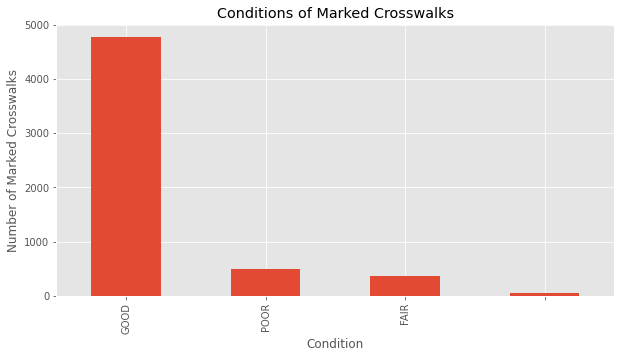

In [31]:
# Seeing the conditions of the crosswalks

fig, ax = plt.subplots(figsize=(10,5))

marked_cross['CONDITION'].value_counts().plot(kind='bar')
ax.set_title('Conditions of Marked Crosswalks')
ax.set_xlabel('Condition')
ax.set_ylabel('Number of Marked Crosswalks');

### Radar Speed Signs

Comparing where there are speed signs to where the collisions are happening is another potential indicator for higher risk collision areas. Maybe people are going slower near the speed signs, decreasing risk of collisions. Or maybe it has the opposite effect. We will be looking into that more later on.  
Again, most of the columns will not be useful to us except for its location.

In [32]:
radar = pd.read_csv('../data/Radar_Speed_Signs.csv')
radar.head()

,X,Y,OBJECTID,COMPKEY,UNITID,UNITDESC,OWNERSHIP,CONDITION,CURRENT_STATUS,OVERRIDEYN,COMPTYPE,SEGKEY,UNITTYPE,BLUE_TOOTH_ENABLED,DATA_COLLECTION_CAPABILITY,SERVICE_POINT,SOLAR_OPERATED,SIDE,SHAPE_LNG,SHAPE_LAT
0,1.260736e+06,257337.873980,1,508865,RSS-1,HOLMAN RD NW 0907 BLOCK NW SIDE ( 110) 110 FT ...,SDOT,GOOD,INSVC,N,16,10938,RSS,N,N,NaN,Y,NW,-122.375191,47.695054
1,1.276266e+06,258974.658109,2,535585,RSS-20,15TH AVE NE 0980 BLOCK W SIDE ( 0) 0 FT /O N...,SDOT,GOOD,PLANNED,N,16,2072,RSS,Y,Y,NaN,Y,W,-122.312268,47.700376
2,1.291550e+06,189642.035446,3,702898,RSS-51,RAINIER AVE S 1010 BLOCK N SIDE ( 355) 1069 FT...,,,INSVC,N,16,12438,RSS,N,N,NaN,Y,N,-122.245047,47.511122
3,1.282505e+06,244565.359086,4,678320,RSS-49,NE 45TH ST 0380 BLOCK S SIDE ( 315) 235 FT W/O...,,,,N,16,16866,RSS,N,N,NaN,N,S,-122.285830,47.661206
4,1.262416e+06,209772.973835,5,600918,RSS-36,SW GENESEE ST 0250 BLOCK N SIDE ( 10) 10 FT W...,,,INSVC,N,16,22200,RSS,N,N,NaN,N,N,-122.364529,47.564773


In [33]:
# #Generate map centered around address
seattle_map = folium.Map(location=[sea_latitude, sea_longitude], zoom_start=13)

#blue markers for bikeracks
for lat, lng, label in zip(radar['SHAPE_LAT'], radar['SHAPE_LNG'], radar['SIDE']):
    folium.features.CircleMarker(
        [lat, lng],
        radius = 3,
        color='purple',
        popup=label,
        fill=True,
        fill_color='purple',
        fill_opacity=0.5
    ).add_to(seattle_map);
    
seattle_map

### Current Land Use Zoning

This is in progress with visualization since it contains a .shp file.

http://data-seattlecitygis.opendata.arcgis.com/datasets/dd29065b5d01420e9686570c2b77502b_0?geometry=-122.383%2C47.606%2C-122.293%2C47.626

In [34]:
zoning = pd.read_csv('../data/Current_Land_Use_Zoning_Detail.csv')
zoning.head()

,OBJECTID,ZONEID,ZONING,CONTRACT,ORDINANCE,EFFECTIVE,HISTORIC,PEDESTRIAN,SHORELINE,OVERLAY,LIGHTRAIL,MHA,IZ,MHA_VALUE,MIO_NAME,CLASS_DESC,CATEGORY_DESC,ZONELUT,DETAIL_DESC,ZONING_DESC,BASE_ZONE,ZONING_PREV,CONTRACT_PREV,ORDINANCE_PREV,EFFECTIVE_PREV,HISTORIC_PREV,PEDESTRIAN_PREV,SHORELINE_PREV,OVERLAY_PREV,LIGHTRAIL_PREV
0,1,3837,DMR/C 75/75-170,,125371,2017/09/01 00:00:00+00,,,,ID,,Y,Y,NaN,NaN,Downtown,Downtown,DMRC,Downtown Mixed,Downtown Mixed Residential/Commercial 75/75-170,DMR/C 75/75-170,DMR/C 75/75-170,,125371.0,2017/09/01 00:00:00+00,,,,,
1,2,4194,SF 7200,,,1970/01/01 00:00:00+00,,,,,,N,N,NaN,NaN,Single Family,Single Family,SF 7200,Single Family 7200,Single Family 7200,SF 7200,NaN,NaN,NaN,1994/05/01 00:00:00+00,NaN,NaN,NaN,NaN,NaN
2,3,4422,LR2 RC (M),,125791,2019/04/19 00:00:00+00,,,,,,Y,N,M,NaN,Multi-Family,Lowrise Multi-Family,LR2 RC,Lowrise 2,Lowrise 2 Residential-Commercial,LR2 RC,LR2 RC,,123495.0,2011/04/19 00:00:00+00,,,,,
3,4,4423,LR1 (M),,125791,2019/04/19 00:00:00+00,,,,,,Y,N,M,NaN,Multi-Family,Lowrise Multi-Family,LR1,Lowrise 1,Lowrise 1,LR1,LR1,,123495.0,2011/04/19 00:00:00+00,,,,,
4,5,4424,LR1 (M),,125791,2019/04/19 00:00:00+00,,,,,,Y,N,M,NaN,Multi-Family,Lowrise Multi-Family,LR1,Lowrise 1,Lowrise 1,LR1,LR1,,123495.0,2011/04/19 00:00:00+00,,,,,


In [35]:
zoning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3549 entries, 0 to 3548
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OBJECTID         3549 non-null   int64  
 1   ZONEID           3549 non-null   int64  
 2   ZONING           3549 non-null   object 
 3   CONTRACT         3548 non-null   object 
 4   ORDINANCE        3527 non-null   object 
 5   EFFECTIVE        3549 non-null   object 
 6   HISTORIC         3549 non-null   object 
 7   PEDESTRIAN       3549 non-null   object 
 8   SHORELINE        3549 non-null   object 
 9   OVERLAY          3549 non-null   object 
 10  LIGHTRAIL        3549 non-null   object 
 11  MHA              3515 non-null   object 
 12  IZ               3549 non-null   object 
 13  MHA_VALUE        2674 non-null   object 
 14  MIO_NAME         287 non-null    object 
 15  CLASS_DESC       3549 non-null   object 
 16  CATEGORY_DESC    3549 non-null   object 
 17  ZONELUT       

It looks like the 'CLASS_DESC' column and the 'CATEGORY_DESC' column are very similar in their values. We will explore the unique values or each and see if they are only slightly varied in the wording.

In [36]:
# Which values are the same in both columns
zoning[zoning['CLASS_DESC'] == zoning['CATEGORY_DESC']]['CLASS_DESC'].unique()

array(['Downtown', 'Single Family', 'Major Institutions',
       'Master Planned Community'], dtype=object)

In [37]:
zoning[zoning['CLASS_DESC'] != zoning['CATEGORY_DESC']].groupby(['CLASS_DESC', 'CATEGORY_DESC']).count()['OBJECTID']

CLASS_DESC                CATEGORY_DESC            
Commercial/Mixed Use      Commercial                    206
                          Neighborhood Commercial       945
                          Seattle Mixed                 114
Manufacturing/Industrial  Industrial                    220
Multi-Family              High-Density Multi-Family      83
                          Lowrise Multi-Family         1161
Single Family             Residential Small Lot         100
Name: OBJECTID, dtype: int64

Looks like 'CLASS_DESC' is a little bit more general than 'CATEGORY_DESC' but it is definitely related.

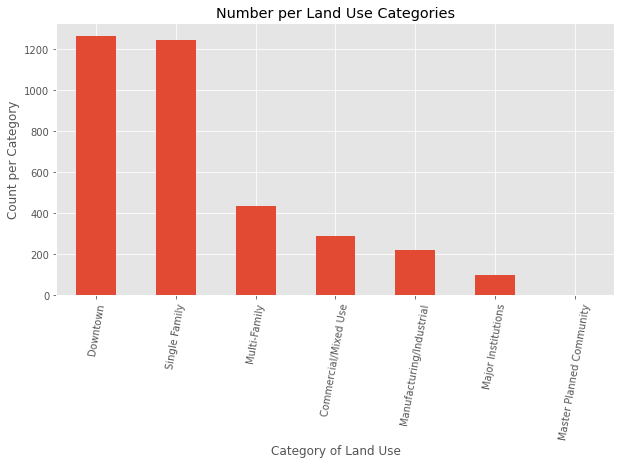

In [38]:
# Seeing the conditions of the crosswalks

fig, ax = plt.subplots(figsize=(10,5))

zoning['CLASS_DESC'].value_counts().plot(kind='bar')
ax.set_title('Number per Land Use Categories')
ax.set_xlabel('Category of Land Use')
ax.set_ylabel('Count per Category')
ax.set_xticklabels(labels=zoning['CLASS_DESC'].unique(), rotation=80);

The locations of the features and the sites of the collisions can all be mapped onto the same map.

In [39]:
# #Generate map centered around address
# seattle_map = folium.Map(location=[sea_latitude, sea_longitude], zoom_start=13)
    
# blue markers for bike racks
for lat, lng, label in zip(bikeracks['SHAPE_LAT'][:100], bikeracks['SHAPE_LNG'][:100], bikeracks['RACK_CAPACITY'].apply(str)[:100]):
    folium.features.CircleMarker(
        [lat, lng],
        radius = 3,
        color='lightblue',
        popup=label,
        fill=True,
        fill_color='lightblue',
        fill_opacity=0.5
    ).add_to(seattle_map)
    
# orange markers for radar speed signs, only contains 51 rows
for lat, lng, label in zip(radar['SHAPE_LAT'], radar['SHAPE_LNG'], radar['SIDE']):
    folium.features.CircleMarker(
        [lat, lng],
        radius = 3,
        color='orange',
        popup=label,
        fill=True,
        fill_color='orange',
        fill_opacity=0.5
    ).add_to(seattle_map)

# green markers for marked crosswalks
for lat, lng, label in zip(marked_cross['SHAPE_LAT'][:100], marked_cross['SHAPE_LNG'][:100], marked_cross['CONDITION'][:100]):
    folium.features.CircleMarker(
        [lat, lng],
        radius = 3,
        color='purple',
        popup=label,
        fill=True,
        fill_color='purple',
        fill_opacity=0.5
    ).add_to(seattle_map)
    
# red rectangular markers for collisions
for lat, lng, label in zip(collisions_df[~collisions_df['X'].isna()]['Y'][:500], collisions_df[~collisions_df['X'].isna()]['X'][:500], collisions_df[~collisions_df['X'].isna()]['SEVERITYDESC'][:500]):
    folium.features.RectangleMarker(
        bounds=[[lat, lng], [lat+0.00085, lng+0.00085]],
#         radius = 3,
        color='black',
        popup=label,
#         fill=True,
        fill_color='red',
        fill_opacity=1
    ).add_to(seattle_map)
    
seattle_map.save('../data/seattle_map.html');

# Calculating Distance between Coordinates

Obtaining the distance of collisions to the different features and finding the nearest ones. We will explore if this will help increase the accuracy of predicting high risk intersections.

In [40]:
# Using the GeoPy library
# pip install geopy
import geopy.distance

In [41]:
# testing cooridnates

coords_1 = (marked_cross['SHAPE_LAT'][0], marked_cross['SHAPE_LNG'][0])
coords_2 = (collisions_df['Y'][0], collisions_df['X'][0])

print(geopy.distance.distance(coords_1, coords_2).miles)

0.8601319867886356
